In [98]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, roc_auc_score

In [100]:
#Importing the datasets
account_attributes = pd.read_excel(r"D:/salesforce/account_attributes.xlsx")
account_usage=pd.read_excel(r"D:/salesforce/account_usage.xlsx")

In [101]:
#information about the attributes dataset
account_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Acct id                     8000 non-null   object
 1   Acct type                   8000 non-null   object
 2   Activate chat bot           8000 non-null   object
 3   Converted to paid customer  8000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 250.1+ KB


In [102]:
#information about the usage dataset
account_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80367 entries, 0 to 80366
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Acct id                80367 non-null  object
 1   Date time              80367 non-null  object
 2   Number of link clicks  80367 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [103]:
#Value counts for the account type and percentage of total customers
print(account_attributes['Acct type'].value_counts())
print(account_attributes['Acct type'].value_counts(normalize=True) * 100)

SMB    4865
ENT    3135
Name: Acct type, dtype: int64
SMB    60.8125
ENT    39.1875
Name: Acct type, dtype: float64


In [104]:
#Encoding the Categorical features to Numerical
account_attributes['Acct_type_encoded'] = account_attributes['Acct type'].apply(lambda x: 0 if x == 'SMB' else 1)
account_attributes['Activate_chat_bot_encoded'] = account_attributes['Activate chat bot'].apply(lambda x: 0 if x == 'N' else 1)

In [105]:
#Value counts for customers activated chat bot
print(account_attributes['Activate chat bot'].value_counts())
print(account_attributes['Activate chat bot'].value_counts(normalize=True) * 100)

Y    4384
N    3616
Name: Activate chat bot, dtype: int64
Y    54.8
N    45.2
Name: Activate chat bot, dtype: float64


In [106]:
#value counts for the customers converted to paid customer
print(account_attributes['Converted to paid customer'].value_counts())
print(account_attributes['Converted to paid customer'].value_counts(normalize=True) * 100)

0    5470
1    2530
Name: Converted to paid customer, dtype: int64
0    68.375
1    31.625
Name: Converted to paid customer, dtype: float64


In [107]:
#converting the Data time type from dtype to data-time type
account_usage['Date time']=pd.to_datetime(account_usage['Date time'])

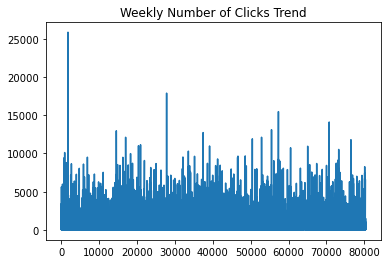

In [108]:
#weekly trend in number of clicks
account_usage['Number of link clicks'].plot(title='Weekly Number of Clicks Trend')
plt.show()

In [109]:
#merging the datasets based on account type for further implementation
m_s=pd.merge(account_attributes,account_usage,on='Acct id',how='inner')
m_s

,Acct id,Acct type,Activate chat bot,Converted to paid customer,Acct_type_encoded,Activate_chat_bot_encoded,Date time,Number of link clicks
0,SA25212,SMB,Y,0,0,1,2019-10-06,2311
1,SA25212,SMB,Y,0,0,1,2019-10-13,1020
2,SA25212,SMB,Y,0,0,1,2019-10-20,1664
3,SA25212,SMB,Y,0,0,1,2019-10-27,2523
4,SA25212,SMB,Y,0,0,1,2019-11-03,1157
...,...,...,...,...,...,...,...,...
80362,SA65176,SMB,N,0,0,0,2020-02-16,218
80363,SA65176,SMB,N,0,0,0,2020-02-23,326
80364,SA65176,SMB,N,0,0,0,2020-03-01,219
80365,SA65176,SMB,N,0,0,0,2020-03-08,292


In [110]:
#to check the monthly sum of link clicks 
account_usage.set_index('Date time', inplace=True)

account_usage['Month'] = account_usage.index.to_period('M')

# Calculating the total number of clicks per month
monthly_total_clicks = account_usage.groupby('Month')['Number of link clicks'].sum()

# Sorting the result in descending order
monthly_total_clicks = monthly_total_clicks.sort_values(ascending=False)

# the result
print(monthly_total_clicks)


Month
2021-01    5790594
2020-11    5518255
2020-12    4702930
2020-08    4635599
2020-10    4245885
2020-09    4078839
2020-05    3772075
2020-07    3361544
2020-03    3361427
2020-06    3042569
2020-04    2839884
2021-02    2653310
2019-12    2627728
2020-02    2570315
2020-01    2388788
2019-09    2176751
2019-11    1867097
2019-10    1840658
2019-08    1489417
2019-06    1202285
2019-07    1184752
2021-03    1038147
2019-05     746032
2019-04     564735
2019-03     464149
2019-02     143209
2021-04      47206
2019-01      36970
Freq: M, Name: Number of link clicks, dtype: int64


In [111]:
#adding the link clicks using by grouping the account id 
account_numclicks_sum=account_usage.groupby(['Acct id']).sum()
account_numclicks_sum.reset_index(inplace=True)

In [112]:
#merging the datasets
merged_accounts=pd.merge(account_attributes,account_numclicks_sum,on='Acct id',how='inner')

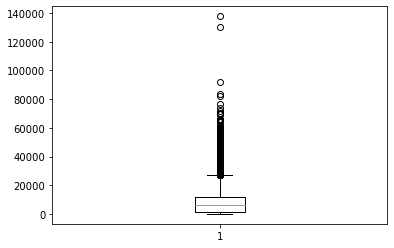

In [113]:
#to check the range of link clicks using boxplot
plt.boxplot(merged_accounts['Number of link clicks'])
# plt.title('Boxplot for feature1')
plt.show()

In [114]:
#applying log transformation to decrease the variance
merged_accounts['Number_of_link_clicks_log'] = np.log1p(merged_accounts['Number of link clicks'])

In [115]:
#Number of link clicks based on account type
merged_accounts.groupby('Acct type')['Number of link clicks'].sum()

Acct type
ENT    25912674
SMB    42478476
Name: Number of link clicks, dtype: int64

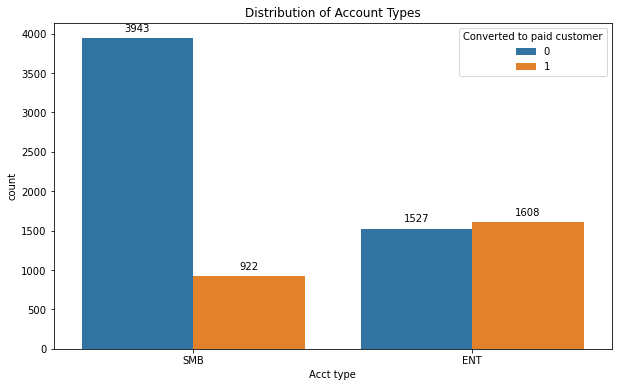

In [116]:
#distribution of account types
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Acct type", data=merged_accounts, hue="Converted to paid customer")

# Add annotations with counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Distribution of Account Types")
plt.show()


In [117]:
#to calculate the conversion rate of converted to paid customers
overall_conversion_rate = merged_accounts['Converted to paid customer'].mean() * 100

# overall conversion rate
print(f"Overall Conversion Rate: {overall_conversion_rate:.2f}%")

conversion_rate_by_type = merged_accounts.groupby('Acct type')['Converted to paid customer'].mean()

# conversion rates
print("Conversion Rate by Account Type:")
print(conversion_rate_by_type * 100)

Overall Conversion Rate: 31.62%
Conversion Rate by Account Type:
Acct type
ENT    51.291866
SMB    18.951696
Name: Converted to paid customer, dtype: float64


In [118]:
grouped_data = merged_accounts.groupby('Acct type').agg({
    'Converted to paid customer': 'mean' ,
    'Activate_chat_bot_encoded': 'mean'
})

# Rename columns for clarity
grouped_data.rename(columns={
    'Converted to paid customer': 'Conversion Rate',
    'Activate_chat_bot_encoded': 'Number of Customers with Chat Bot'
}, inplace=True)

# the result
print(grouped_data * 100)

           Conversion Rate  Number of Customers with Chat Bot
Acct type                                                    
ENT              51.291866                          62.456140
SMB              18.951696                          49.866393


Text(0, 0.5, 'Frequency')

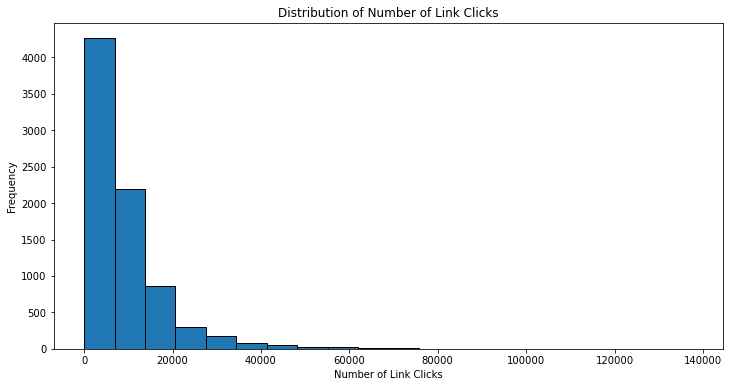

In [119]:
plt.figure(figsize=(12, 6))
plt.hist(merged_accounts["Number of link clicks"], bins=20, edgecolor='black')
plt.title("Distribution of Number of Link Clicks")
plt.xlabel("Number of Link Clicks")
plt.ylabel("Frequency")


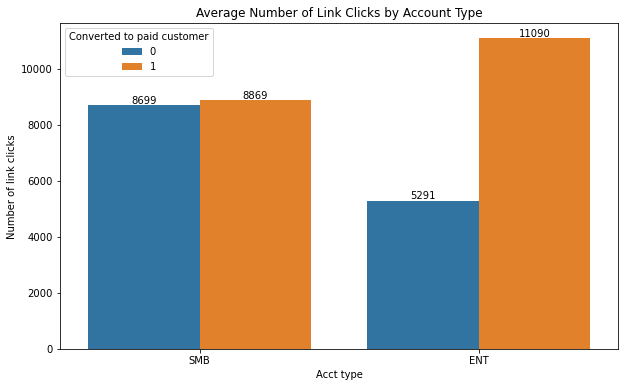

In [120]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Acct type", y="Number of link clicks", data=merged_accounts, hue="Converted to paid customer", ci=None)

# Add annotations with counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title("Average Number of Link Clicks by Account Type")
plt.show()

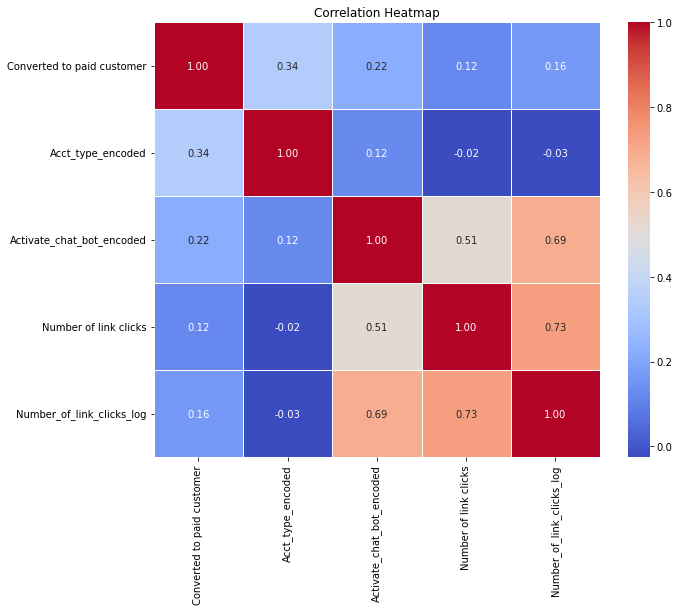

In [121]:
# Calculating the correlation matrix
corr_matrix = merged_accounts.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [122]:
#x-train
x_1=merged_accounts[['Acct_type_encoded','Activate_chat_bot_encoded','Number of link clicks']]

In [123]:
#y-train
y_1=merged_accounts[['Converted to paid customer']]
# changing a 2-dimensional array or a multi-dimensional array into a contiguous flattened array
y_1 = y_1.values.ravel()


In [124]:
# Initializing and fitting models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier()
}

In [125]:
for name, model in models.items():
    # cross_val_predict for k-fold cross-validation predictions
    y_pred = cross_val_predict(model, x_1, y_1, cv=5)
    
    # Calculating the confusion matrix
    conf_matrix = confusion_matrix(y_1, y_pred)
    
    # Calculating additional evaluation metrics
    accuracy = accuracy_score(y_1, y_pred)
    precision = precision_score(y_1, y_pred)
    roc_auc = roc_auc_score(y_1, y_pred)  # Assuming y_1 is binary (0 or 1)
    
    # Displaying the evaluation metrics
    print(f"\n{model.__class__.__name__} Metrics:")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")



LogisticRegression Metrics:
Confusion Matrix:
[[5157  313]
 [1928  602]]
Accuracy: 0.7199
Precision: 0.6579
AUC-ROC: 0.5904

DecisionTreeClassifier Metrics:
Confusion Matrix:
[[4236 1234]
 [1374 1156]]
Accuracy: 0.6740
Precision: 0.4837
AUC-ROC: 0.6157

RandomForestClassifier Metrics:
Confusion Matrix:
[[4225 1245]
 [1350 1180]]
Accuracy: 0.6756
Precision: 0.4866
AUC-ROC: 0.6194

SVC Metrics:
Confusion Matrix:
[[5468    2]
 [2529    1]]
Accuracy: 0.6836
Precision: 0.3333
AUC-ROC: 0.5000

KNeighborsClassifier Metrics:
Confusion Matrix:
[[4425 1045]
 [1921  609]]
Accuracy: 0.6292
Precision: 0.3682
AUC-ROC: 0.5248


In [126]:
#x-2 train
x_2=merged_accounts[['Acct_type_encoded','Activate_chat_bot_encoded','Number_of_link_clicks_log']]

In [127]:
for name, model in models.items():
    # Use cross_val_predict for k-fold cross-validation predictions
    y_pred = cross_val_predict(model, x_2, y_1, cv=5)
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_1, y_pred)
    
    # Calculate additional evaluation metrics
    accuracy = accuracy_score(y_1, y_pred)
    precision = precision_score(y_1, y_pred)
    roc_auc = roc_auc_score(y_1, y_pred)  # Assuming y_1 is binary (0 or 1)
    
    # Display the evaluation metrics
    print(f"\n{model.__class__.__name__} Metrics:")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")



LogisticRegression Metrics:
Confusion Matrix:
[[4862  608]
 [1180 1350]]
Accuracy: 0.7765
Precision: 0.6895
AUC-ROC: 0.7112

DecisionTreeClassifier Metrics:
Confusion Matrix:
[[4245 1225]
 [1368 1162]]
Accuracy: 0.6759
Precision: 0.4868
AUC-ROC: 0.6177

RandomForestClassifier Metrics:
Confusion Matrix:
[[4225 1245]
 [1346 1184]]
Accuracy: 0.6761
Precision: 0.4874
AUC-ROC: 0.6202

SVC Metrics:
Confusion Matrix:
[[4752  718]
 [1160 1370]]
Accuracy: 0.7652
Precision: 0.6561
AUC-ROC: 0.7051

KNeighborsClassifier Metrics:
Confusion Matrix:
[[4734  736]
 [1320 1210]]
Accuracy: 0.7430
Precision: 0.6218
AUC-ROC: 0.6719


In [128]:
#dumping the model 
logistic_regression_model = models['Logistic Regression']
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(logistic_regression_model, model_file)


How is the AnswerForce trial program doing?

In [129]:
# Convert 'Date time' column to datetime type
m_s['Date time'] = pd.to_datetime(m_s['Date time'])

# Extract quarter information
m_s['Quarter'] = m_s['Date time'].dt.to_period('Q')

# Create a pivot table
pivot_table = m_s.groupby(['Quarter', 'Acct type'])['Converted to paid customer'].sum().unstack(fill_value=0)

# Display the pivot table
print(pivot_table)

Acct type   ENT   SMB
Quarter              
2019Q1      122   122
2019Q2      468   319
2019Q3     1067   726
2019Q4     1652   786
2020Q1     1963  1191
2020Q2     2451  1381
2020Q3     2582  1618
2020Q4     3236  1966
2021Q1     2474  1114
2021Q2       11     5


In [130]:
# account_usage

quarterly_sum = account_usage['Number of link clicks'].resample('Q').sum()
quarterly_sum


Date time
2019-03-31      644328
2019-06-30     2513052
2019-09-30     4850920
2019-12-31     6335483
2020-03-31     8320530
2020-06-30     9654528
2020-09-30    12075982
2020-12-31    14467070
2021-03-31     9482051
2021-06-30       47206
Freq: Q-DEC, Name: Number of link clicks, dtype: int64

In [131]:
#to see the customers converting to paid customers
m_s['Date time'] = pd.to_datetime(m_s['Date time'])
m_s.set_index('Date time', inplace=True)
m_s.sort_values('Date time', inplace=True)

# Calculating the cumulative sum for each 'Acct id'
m_s['Cumulative Converted'] = m_s.groupby('Acct id')['Converted to paid customer'].cumsum()

quarterly_data = m_s.resample('Q')['Acct id'].nunique()
print(quarterly_data)


Date time
2019-03-31     150
2019-06-30     488
2019-09-30     884
2019-12-31    1297
2020-03-31    1686
2020-06-30    1960
2020-09-30    2358
2020-12-31    2869
2021-03-31    1743
2021-06-30      62
Freq: Q-DEC, Name: Acct id, dtype: int64


Is there anything they can do to improve the AnswerForce trial program? 
1.Ways to increase the Conversion rate in SMB 
2.Promotional offers for second-time subscription 
3.User Feedback


Which customers are most likely to convert to paid customers? How do we identify the potential customers who are most likely to convert? 
1.ENT Businesses will be more likely to convert to paid customers
2.Businesses activated Chat Bot likely to convert to paid customers
3.Logistic Regression 
